In [26]:
from keras.models import model_from_yaml
import h5py
from PIL import Image
%matplotlib inline
import os, sys
import numpy as np
from matplotlib import pyplot as plt

In [27]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [28]:
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("modelwts.h5")
print("Loaded model from disk")

Loaded model from disk


In [29]:
loaded_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [30]:
imgs = ImageDataGenerator()

batches = imgs.flow_from_directory(
        't1/',
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=2,
        class_mode=None)

Found 10 images belonging to 1 classes.


In [31]:
probs = loaded_model.predict_generator(batches,5)
filenames = batches.filenames

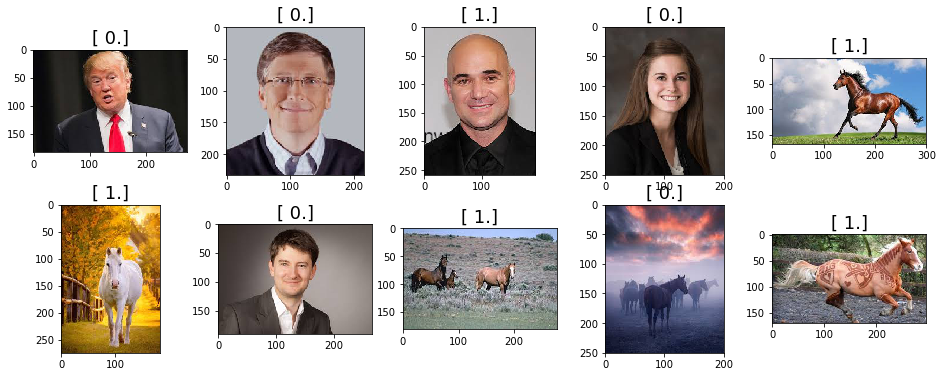

In [32]:
plots([load_img('t1/' + filenames[i]) for i in range(10)], figsize=(16,6),rows=2,titles=probs)